In [89]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize, misc, integrate
import math

- open everything including internet and wolfram alpha.
- Just no communication
- The total score is 650. You only need to do 600 to get full score.

In [2]:
score = 100 + 75 + 100 + 50 + 100 + 200
print(score, score/600.)

625 1.0416666666666667


## Problem 1

### 1.1) (50) <span style="color:red;">50</span>
Find the intersection between these two lines. Get both of them and make sure your uncertainty is less than 1e-6.

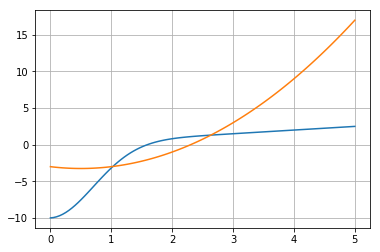

In [68]:
def f(x):
    return -10*np.exp(-x**2)+0.5*x
def g(x):
    return x**2 - x - 3

xs = np.linspace(0,5,100)
fys = f(xs)
gys = g(xs)
fgys = fg(xs)
plt.plot(xs, fys)
plt.plot(xs, gys)
plt.grid()


first intersection is at x= 1.026559829711914
second intersection is at x= 2.634897232055664


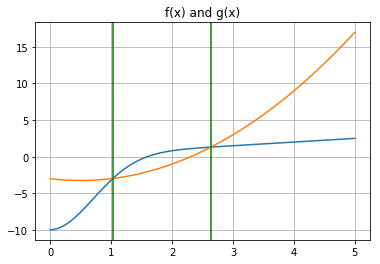

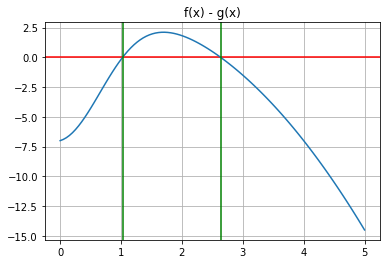

In [29]:
#ANSWER
def f(x):
    return -10*np.exp(-x**2)+0.5*x
def g(x):
    return x**2 - x - 3

def fg(x):
    return f(x)-g(x)
def bisect(f, left, right, err):
    r = right
    l = left
    guess = None
    n = math.ceil(math.log(abs(right-left))-math.log(err)/math.log(2)-1)
    for _ in range(n):
        guess = (l + r)/2
        if(f(guess)*f(l) < 0):
            r = guess
        else:
            l = guess
    return guess
first_intersection = bisect(fg, 0, 2, 1e-6)
second_intersection = bisect(fg, 2, 4, 1e-6)
print("first intersection is at x=", first_intersection)
print("second intersection is at x=", second_intersection)
xs = np.linspace(0,5,100)
fys = f(xs)
gys = g(xs)
fgys = fg(xs)
plt.plot(xs, fys)
plt.plot(xs, gys)
plt.grid()
plt.axvline(first_intersection, color="green")
plt.axvline(second_intersection, color="green")
plt.title("f(x) and g(x)")

plt.figure()
plt.grid()
plt.title("f(x) - g(x)")
plt.axhline(color="red")
plt.plot(xs, fgys)
plt.axvline(first_intersection, color="green")
plt.axvline(second_intersection, color="green")

### 1.2) (50) <span style="color:red;">50</span>
Consider finding $\sqrt[7]{18} = x$ (the real root).

Show that we can find such number with the following formula

$$
x_{n+1} = A x_n + \frac{B}{x_n^C}
$$

Find $A, B, C$. Be careful with the sign.
    





### ANS
We can do this from newtown method updating rule
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$
lets $f(x) = x^7-18$  
\begin{align*}
x_{n+1} &= x_n - \frac{f(x_n)}{f'(x_n)} \newline
x_{n+1} &= x_n - \frac{(x_n)^{7}-18}{7(x_{n})^{6}} \newline
x_{n+1} &= \frac{7x_{n}^{7} - x_{n}^{7}+18}{7x_{n}^{6}} \newline
x_{n+1} &= \frac{6x_{n}^{7} +18}{7x_{n}^{6}} \newline
x_{n+1} &= \frac{6}{7}x_{n} + \frac{\frac{18}{7}}{x_n^6} \newline
\end{align*}
$$A = \frac{6}{7}, B = \frac{18}{7}, C = 6$$

In [295]:
print("A =", 6/7)
print("B =", 18/7)
print("C =", 6)

A = 0.8571428571428571
B = 2.5714285714285716
C = 6


## Problem 2 (Wolfram-alpha is your friend)

### 1)  (50) <span style="color:red;">50</span>

Find taylor series for around x=0 for 4 **non-zero** term.

$f(x) = e^x \sin(x)$

and use it to find $e\times sin(1)$

### ANS
Taylor series of 4 non-zero terms is
$$e^xsin(x) = x+x^2+\frac{x^3}{3}-\frac{x^5}{30}+\frac{f^{(6)}(\xi)}{6!}x^6$$

actual value of e*sin(1) is 2.2873552871788423
taylor approx value of e*sin(1) is 2.3000000000000003


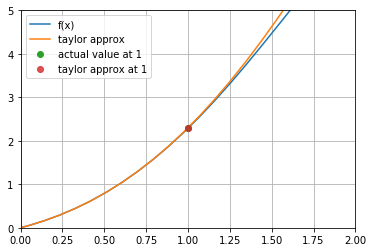

In [151]:
#ANSWER
def f(x):
    return np.exp(x)*np.sin(x)
def taylor_approx(x):
    return x+x**2+x**3/3-x**5/30
xs = np.linspace(-4.6, 4.6, 100)
ys = [f(x) for x in xs]
ys1 = [taylor_approx(x) for x in xs]
plt.plot(xs, ys, label="f(x)")
plt.plot(xs, ys1, label="taylor approx")
plt.plot(1, f(1), 'o', label="actual value at 1")
plt.plot(1, taylor_approx(1), 'o', label="taylor approx at 1", alpha=0.8)
plt.ylim(0, 5)
plt.xlim(0, 2)
plt.grid()
plt.legend()
print("actual value of e*sin(1) is", f(1))
print("taylor approx value of e*sin(1) is", taylor_approx(1))

### 2) (50) <span style="color:red;">25 max not at 0</span>

Given what you did above what is your uncertainty?




In [152]:
print("error from graph I plotted above =", f(1)-taylor_approx(1))

error from graph I plotted above = -0.012644712821157977


Truncate error of taylor series is
$$err \approx \frac{f^{(6)}(\xi)}{6!}x^6$$
the upperbound of $f^{(6)}(\xi)$ in close interval $[0, 1]$ is $-8$
$$err \approx \frac{-8}{6!}(1)^6$$
$$err \approx -0.011111111111111112$$

## Problem 3

### 3.1 (50) <span style="color:red;">50</span>
Suppose that we want to perform linear regression of data points $x^{(i)}$ and $y^{(i)}$ for $i=1\ldots n$ with the function

$$
y = A \sin(x) + B \cos(x) + C
$$

Write down the normal equation(matrix that you need to solve to get A,B,C).


### ANS
Let the cost function be sum of distances between points and the above function
$$cost(A, B, C) = \sum_{i}^{n}(y_i - Asin(x_i) - Bcos(x_i)-C)^2$$
we want to minimize that cost function, so we want $\nabla cost = \vec{0}^{\,}$ 
\begin{align*}
\frac{\partial cost}{\partial A} = 0 &= \sum_{i}^{n}(sin(x_i)y_i - Asin^2(x_i) - Bsin(x_i)cos(x_i)-sin(x_i)C)\\
\frac{\partial cost}{\partial B} = 0 &= \sum_{i}^{n}(cos(x_i)y_i - Asin(x_i)cos(x_i) - Bcos^2(x_i)-cos(x_i)C)\\
\frac{\partial cost}{\partial C} = 0 &= \sum_{i}^{n}(y_i - Asin(x_i) - Bcos(x_i)-C)\\
\end{align*}
Putting everything into matricies  
$$\begin{bmatrix}
    \sum_i^n sin^2(x_i)       & \sum_i^n sin(x_i)cos(x_i) & \sum_i^n sin(x_i) \\
    \sum_i^n sin(x_i)cos(x_i)       & \sum_i^n cos^2(x_i) & \sum_i^n cos(x_i) \\
    \sum_i^n sin(x_i)       & \sum_i^n cos(x_i) & n
\end{bmatrix}
\begin{bmatrix}
    A\\
    B\\
    C 
\end{bmatrix}
=
\begin{bmatrix}
    \sum_i^n sin(x_i)y_i\\
    \sum_i^n cos(x_i)y_i\\
    \sum_i^n y_i 
\end{bmatrix}$$
finally, do guassian elimination, then we will get the answers

### 3.2 (50) <span style="color:red;">50</span>

Find Legendre Polynomial which passes through all these points

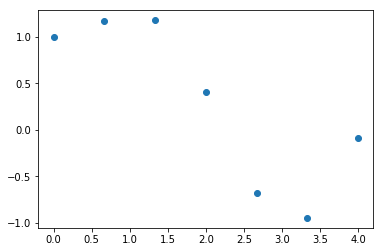

In [31]:
xs = np.linspace(0,4,7)
ys = np.sin(xs)**2 + np.cos(xs)
plt.plot(xs, ys, 'o')

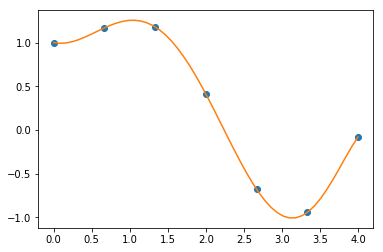

In [33]:
def make_legendre(xs, ys):
    def legendre(x):
        summation = 0
        for ix1, x1 in enumerate(xs):
            w = 1
            for ix2, x2 in enumerate(xs):
                if(ix1 != ix2):
                    w *= (x-x2)/(x1-x2)
            summation += ys[ix1]*w
        return summation
    return legendre

l = make_legendre(xs, ys)
plt.plot(xs, ys, 'o')
xs = np.linspace(xs[0], xs[-1])
plt.plot(xs, [l(x) for x in xs])

## Problem 4 (50) <span style="color:red;">50</span>

Fit the data given in `problem4.txt` with the function of the form.
$$
    f(x) = A\exp(-(x-\mu)^2)+Bx
$$

Find $A, \mu, B$ which gives you the best fit.

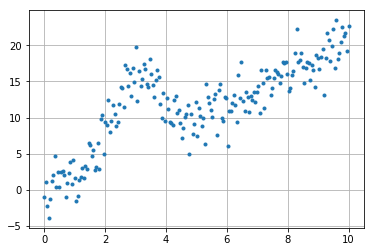

In [69]:
xs, ys = np.loadtxt('problem4.txt')
plt.plot(xs, ys, '.')
plt.grid()

A = 10.114809329491031
mu = 3.001079852369002
B = 2.004612002814657


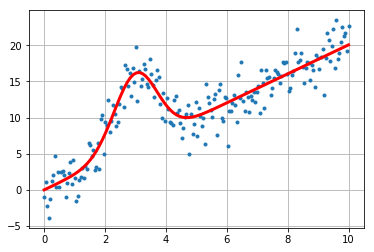

In [70]:
#ANSWER
xs, ys = np.loadtxt('problem4.txt')
def cost_function(v):
    A, mu, B = v
    return sum([(ys[i]-(A*np.exp(-(xs[i]-mu)**2)+B*xs[i]))**2 for i in range(len(xs))])

A, mu, B = optimize.minimize(cost_function, np.array([10,2,3.2])).x
print("A =", A)
print("mu =", mu)
print("B =", B)
plt.plot(xs, ys, '.')
plt.grid()
xs = np.linspace(min(xs), max(xs), 100)
plt.plot(xs, [A*np.exp(-(xs[i]-mu)**2)+B*xs[i] for i in range(len(xs))], color="red", lw=3)

## Problem 5

### 5.1 (50) <span style="color:red;">50</span>

Use trapezoid rule to find the following integral. Make sure the uncertainty of your answer is less than $10^{-5}$

$$
     \int_0^2 3\sin(x) \; \text{dx}
$$



### ANS
Truncate error of trapezoid rule is
$$err = -\frac{(b-a)^3}{12n^2}f''(\xi)$$
where b = integral upperbound, a = integral lowerbound, n = number of subdivisions and $f''(\xi)$ = upperbound of the truncated term  
Since $b=2, a=0$ and $err = 10^{-5}$, to have truncate error less than $10^{-5}$, we can setup
$$10^{-5} = -\frac{8}{12n^2}f''(\xi)$$
upper boundary of $f''(\xi)$ in the closed interval $[0, 2]$ is -3, so
$$10^{-5} = \frac{2}{n^2}$$
$$n^2 = 2 \cdot 10^5$$
Therefore, we have  
number of subdivisions in order to have error less than $10^{-5}$ is 1415

In [297]:
#ANSWER
def f(x):
    return 3*np.sin(x)

def trap(f, a, b, n=1415):
    h = (b-a)/n
    return (1/2)*(h)*(f(a)+f(b)+sum([2*f(a+i*h) for i in range(1, n)]))


print("Trapezoid estimation with 1415 sub divisions = ",trap(f, 0, 2))
print(trap(f, 0, 2) - integrate.quad(f, 0, 2)[0] < 10e-5)

Trapezoid estimation with 1415 sub divisions =  4.248439802354844
True


### 5.2 (50) <span style="color:red;">50</span>

Plot **first** and **second** derivative of $\sin(\sin(x))$ for $x=0\ldots 2\pi$. Yes there are two $\sin$s.

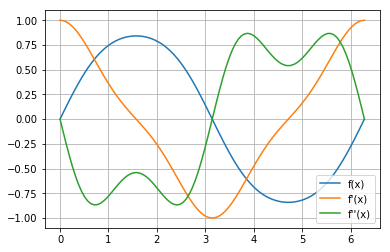

In [83]:
#ANSWER
def f(x):
    return np.sin(np.sin(x))
def df(f, x, h=0.001):
    return (f(x+h)-f(x-h))/(2*h)
def df2(f, x, h=0.001):
    return (f(x+2*h)-(2*f(x))+f(x-2*h))/(4*h**2)

xs = np.linspace(0, 2*np.pi, 100)
ys = [f(x) for x in xs]
ys1 = [df(f, x) for x in xs]
ys2 = [df2(f, x) for x in xs]
plt.plot(xs,ys, label="f(x)")
plt.plot(xs, ys1, label="f'(x)")
plt.plot(xs, ys2, label="f''(x)")
plt.grid()
plt.legend()

## Problem 6

Enough for boring basic stuff. Let's do Something Fun

### 6.1 (100) <span style="color:red;">100</span>

Find the value $C$ such that the area enclosed between the two curves$f,g$ is exactly 1. Area under the blue line but above the orange line.

$$
    f(x) = -10\exp(-x^2)+0.5x\\
    g(x) = x^2 - x - C
$$






(0.9999999999999993, 1.1102230246251558e-14)


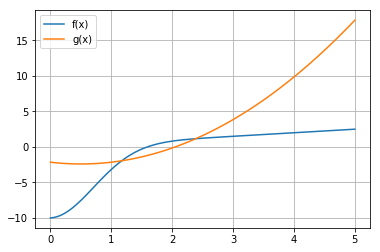

In [426]:
def f(x):
    return -10*np.exp(-x**2)+0.5*x
def g(x):
    return x**2 - x - 2.1486998705023805 # this is just an example when C = 3
def fg(x):
    return f(x) - g(x)
xs = np.linspace(0,5,100)
fys = f(xs)
gys = g(xs)
plt.plot(xs, fys, label="f(x)")
plt.plot(xs, gys, label="g(x)")
plt.grid()
plt.legend()
print(integrate.quad(fg, 1.17177668,2.38632428))

In [427]:
#ANSWER
def f(x):
    return -10*np.exp(-x**2)+0.5*x
def g(x, C):
    return x**2 - x - C
def fg(C):
    def function(x):
        return (-10*np.exp(-x**2)+0.5*x)-(x**2 - x - C)
    return function

def bisect(f, l, r):
    n = math.ceil((math.log(abs(r-l))-math.log(math.pow(10, -6)))/math.log(2)-1)
    guess = None
    for i in range(n):
        guess = (l+r)/2
        if(f(guess)*f(l) < 0):
            r = guess
        else:
            l = guess
    return guess
        
def allsoln(f):
    xs = np.linspace(0, 5, 1000)
    ys = [f(x) for x in xs]
    left = bisection(-1000, xs[ys.index(max(ys))])
    right = bisection(xs[ys.index(max(ys))], 1000)
    return left, right
    
        
def tot_area(c, v):
    mid = c/2
    f = fg(c)
    left = optimize.fsolve(f, 0)
    right = optimize.fsolve(f, 5)
    area = integrate.quad(f, left, right)[0]
    for i in range(100):
        if area >= v:
            c -= mid
        else:
            c += mid
        mid /= 2
        f = fg(c)
        left = optimize.fsolve(f, 0)
        right = optimize.fsolve(f, 5)
        area = integrate.quad(f, left, right)[0]
    return c

C = tot_area(1.11, 1)
print("C =", C)

C = 2.1486998705023805


### 6.2 (100) <span style="color:red;">100</span>

AJ Piti did financial calculation and found that starting a fradulent cult embezzleing money from less scientific people would make more money than being an AJ.

So, he decided to start a cult worshipping the Puyo god. To establish the cult head quarter AJ piti needs to buy **6 plots** of lands. He then tie holy threads between all 6 plots so it would looks somewhat holy. (There are $6\times5/2$ connections in total.)

However, the cost of a land plot depends on it's location(x,y). In particular the plot of land at (x,y)
$$
\text{landcost}(x,y) = 2x^2 + y^2
$$
This means that the further way the land plot is from the center the higher the cost and he needs to buy **6 plots** in total.

However, there is an advantage of buying the plot far away from each other since the longer the holy thread the more holy it looks and the more unscientific people he could lure in. In particular, the income is given buy.
$$
\text{holy thread income} = 10\times\text{total holy thread length}
$$

**Your Task:** Help AJ Piti find the **6 land plots** which would maximize the profit of his cult.

Hint: 

- `v.reshape(6,2)` would make your code a bit nicer.
- Be careful with starting point.
- You may use scipy.optimize.minimize


all plots are at  [[ -4.172861     4.48998631]
 [  2.33481155  14.25183878]
 [  4.17285864  -4.4899959 ]
 [  0.58948555 -24.66488728]
 [ -0.589468    24.66488923]
 [ -2.33482348 -14.25183696]]


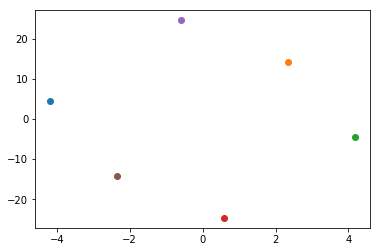

In [380]:
def dist(a, b):
    return np.linalg.norm(a-b)
def land_cost(x, y):
    return 2*x**2+y**2

def cost_function(v):
    plots = v.reshape(6, 2)
    tot_dist = 0
    for i in range(6):
        for j in range(i+1, 6):
            tot_dist += dist(plots[i], plots[j])
    #print(tot_dist)
    lcs = sum([land_cost(p[0], p[1]) for p in plots])
    inc = 10*tot_dist
    #plt.plot(inc, lcs, 'o')
    return -(inc-lcs)

initial = np.array([
    [0, 0],
    [1, 0],
    [20, 1],
    [1, -3],
    [0, 2],
    [-10, -5]
])
v = optimize.minimize(cost_function, initial.reshape(-1)).x
print("all plots are at ", v.reshape(6, 2))
for i in v.reshape(6, 2):
    plt.plot(i[0], i[1], 'o')

